In [5]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns
import pandas_profiling

from collections import Counter
%matplotlib inline

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_mode_interactivity = "all"

In [7]:
bank_input=pd.read_csv(r'bank-full.csv')

In [8]:
#report = pandas_profiling.ProfileReport(bank_input)
#covert profile report as html file
#report.to_file("bank_data.html")


In [9]:
 bank_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
bank_input['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

### Data exploration

Text(-10.825,0.5,'Balance')

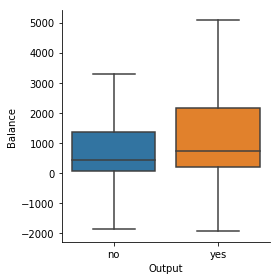

In [11]:
sns.factorplot(x='y',y='balance',
               data=bank_input,kind='box', showfliers = False)
plt.xlabel("Output")
plt.ylabel("Balance")

In [12]:
def convert_output(output):
    if output == 'no':
        output=0
    else:
        output=1
    return output
      
bank_input['output'] = bank_input['y'].apply(convert_output)

In [13]:
def convert_pday(pday):
    if pday <0:
        pday=0
    return pday
      
bank_input['pdays'] = bank_input['pdays'].apply(convert_pday)

<Figure size 720x360 with 0 Axes>

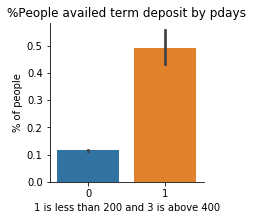

In [14]:
def convert_day(pday):
    if pday >400:
        pday=1
    else:
        pday=0
    return pday
      
bank_input['pdays_cat'] = bank_input['pdays'].apply(convert_day)


plt.figure(figsize=(10,5))
mx = sns.factorplot(x="pdays_cat", y="output", data=bank_input, kind="bar", size=3)
mx.set(ylabel='% of people')
plt.title('%People availed term deposit by pdays');
plt.xlabel('1 is less than 200 and 3 is above 400')
plt.show()

<Figure size 720x360 with 0 Axes>

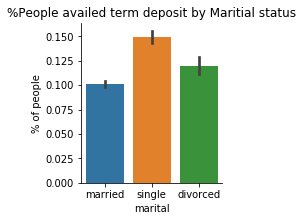

In [15]:
plt.figure(figsize=(10,5))
mx = sns.factorplot(x="marital", y="output", data=bank_input, kind="bar", size=3)
mx.set(ylabel='% of people')
plt.title('%People availed term deposit by Maritial status');
plt.show()


<Figure size 720x216 with 0 Axes>

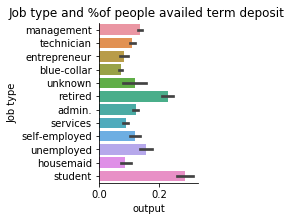

In [16]:
plt.figure(figsize=(10,3))
mx = sns.factorplot(y="job",x="output", data=bank_input, kind="bar", size=3)
mx.set(ylabel='Job type')
plt.title('Job type and %of people availed term deposit ');
plt.show()

Text(0.5,0.98,'Count plot of term deposit taken Vs education')

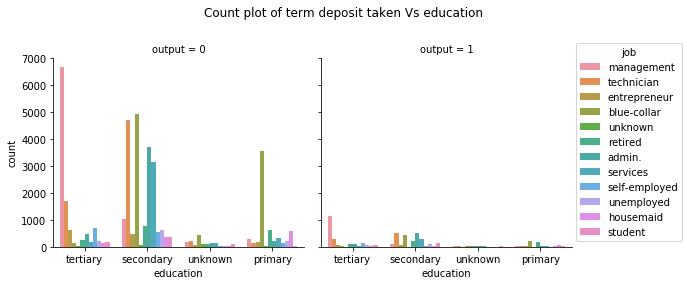

In [17]:
sns.factorplot('education', data=bank_input, kind='count', hue="job",col="output")
plt.subplots_adjust(top=.8)
plt.suptitle('Count plot of term deposit taken Vs education')

<Figure size 720x216 with 0 Axes>

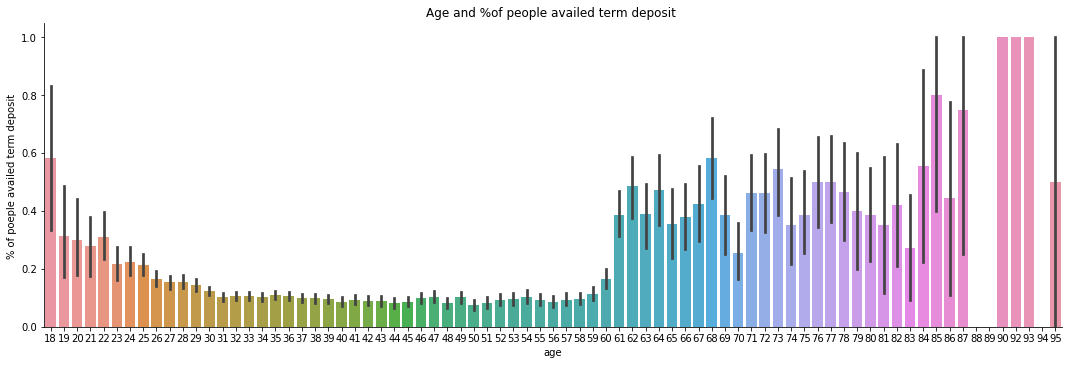

In [18]:
plt.figure(figsize=(10,3))
mx = sns.factorplot(x="age",y="output", data=bank_input, kind="bar", size=5,aspect=3)
mx.set(ylabel='% of poeple availed term deposit ')
plt.title('Age and %of people availed term deposit ');
plt.show()

C:\Users\sandeep.rathod\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Agewise distribution of the people')

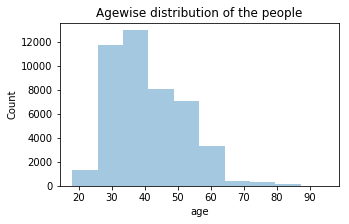

In [19]:
plt.figure(figsize=(5,3))
sns.distplot(bank_input['age'], bins=10, kde=False)
plt.ylabel('Count')
plt.title('Agewise distribution of the people')

Text(0.5,0.98,'Scatterplot of poeple grouped by balance and Age')

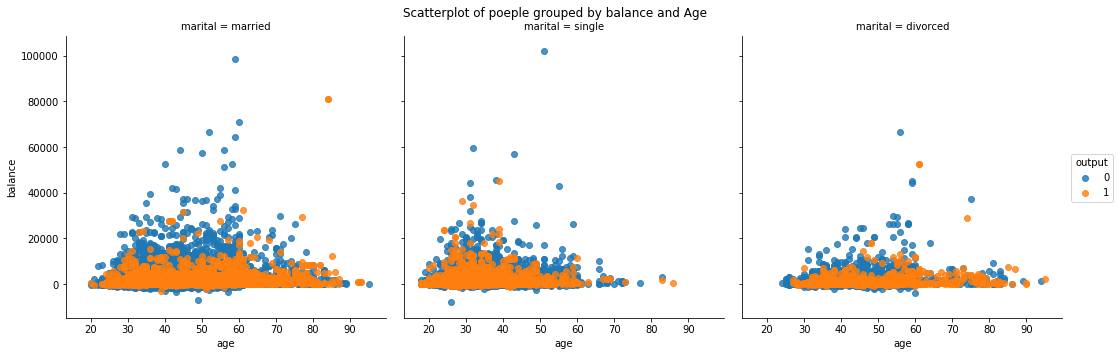

In [20]:
sns.lmplot('age', 'balance', data=bank_input, fit_reg=False, hue="output",col="marital")
plt.subplots_adjust(top=0.9)
plt.suptitle('Scatterplot of poeple grouped by balance and Age')

<Figure size 720x360 with 0 Axes>

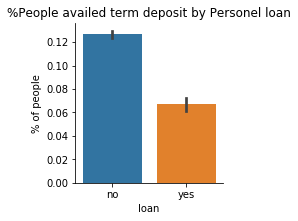

In [21]:
plt.figure(figsize=(10,5))
mx = sns.factorplot(x="loan", y="output", data=bank_input, kind="bar", size=3)
mx.set(ylabel='% of people')
plt.title('%People availed term deposit by Personel loan');
plt.show()

<Figure size 720x216 with 0 Axes>

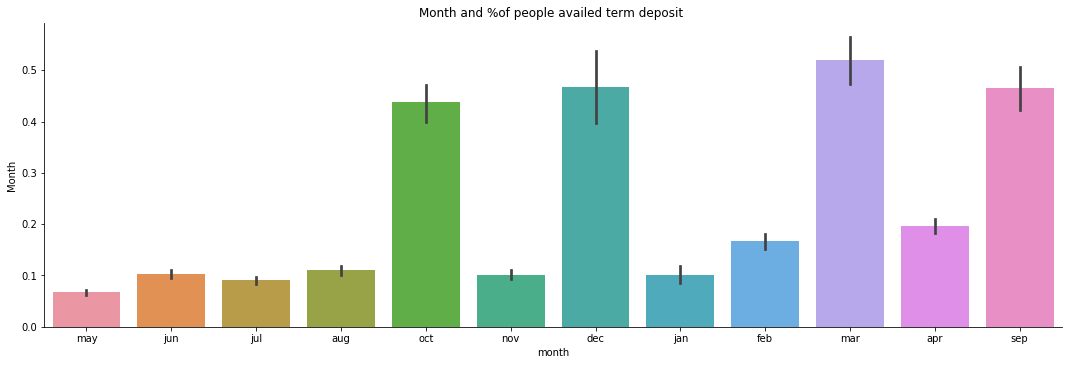

In [22]:
plt.figure(figsize=(10,3))
mx = sns.factorplot(x="month",y="output", data=bank_input, kind="bar", size=5,aspect=3)
mx.set(ylabel='Month')
plt.title('Month and %of people availed term deposit ');
plt.show()

<Figure size 720x216 with 0 Axes>

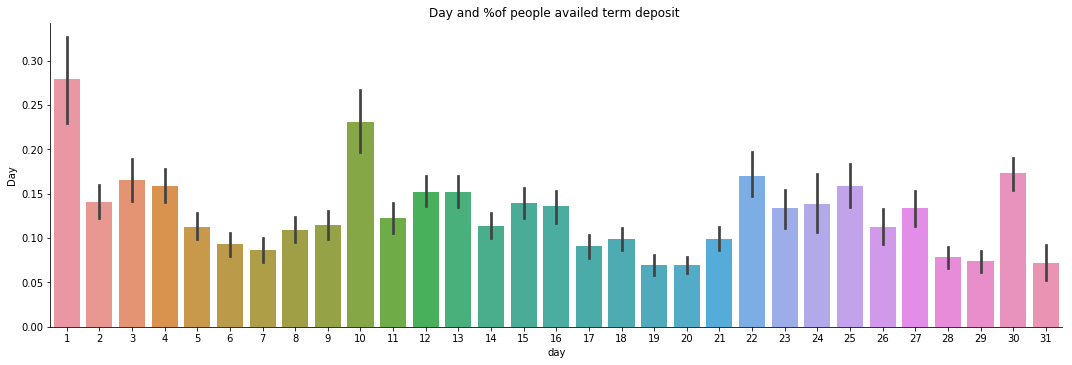

In [23]:
plt.figure(figsize=(10,3))
mx = sns.factorplot(x="day",y="output", data=bank_input, kind="bar", size=5,aspect=3)
mx.set(ylabel='Day')
plt.title('Day and %of people availed term deposit ');
plt.show()

<Figure size 360x144 with 0 Axes>

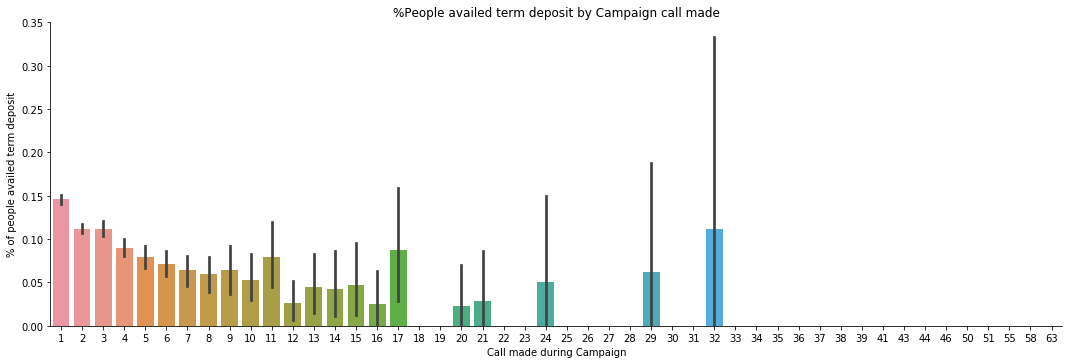

In [24]:
plt.figure(figsize=(5,2))
mx = sns.factorplot(x="campaign", y="output", data=bank_input, kind="bar", size=5 ,aspect=3)
mx.set(xlabel='Call made during Campaign')
mx.set(ylabel='% of people availed term deposit')
plt.title('%People availed term deposit by Campaign call made');
plt.show()


<Figure size 360x144 with 0 Axes>

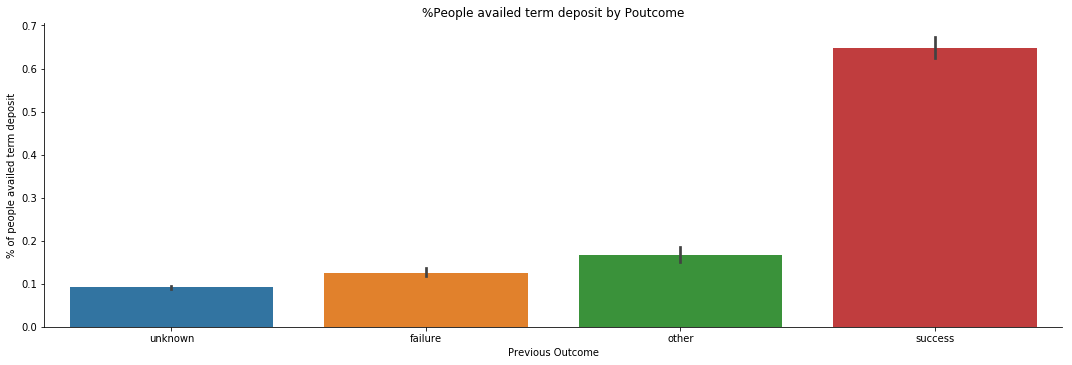

In [25]:
plt.figure(figsize=(5,2))
mx = sns.factorplot(x="poutcome", y="output", data=bank_input, kind="bar", size=5 ,aspect=3)
mx.set(xlabel='Previous Outcome')
mx.set(ylabel='% of people availed term deposit')
plt.title('%People availed term deposit by Poutcome');
plt.show()


Text(0.5,1,'Scatterplot of poeple grouped by balance and Age')

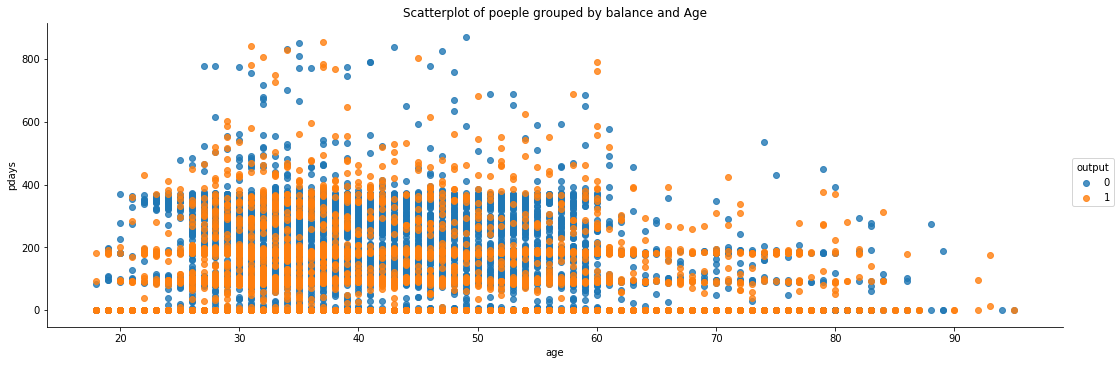

In [26]:
sns.lmplot('age', 'pdays', data=bank_input, fit_reg=False, hue="output",size=5,aspect=3)

plt.title('Scatterplot of poeple grouped by balance and Age')

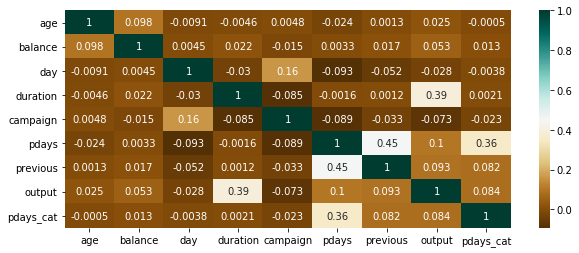

In [27]:
corr =bank_input.corr()

plt.figure(figsize=(10,4))
sns.heatmap(corr,cmap="BrBG",annot = True)
plt.show()

### 4. Feature Engineering  <a id='feature'>

In [28]:
bank_input.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,output,pdays_cat
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,0,unknown,no,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,0,unknown,no,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,0,unknown,no,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,0,unknown,no,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,0,unknown,no,0,0


In [29]:
# agegroup below 30 and above 59 as a categorical feature
def age_output(age):
    if age <31:
        age=1
    elif age>59:
        age=3
    else:
        age=2
    return age
      
bank_input['is_sing_ret'] = bank_input['age'].apply(age_output)

In [30]:
# Previous contact made as a categorical feature
def prev_output(prev):
    if prev <11 :
        prev=1
    else:
        prev=0
    return prev
      
bank_input['is_prev10'] = bank_input['previous'].apply(prev_output)

In [31]:
# First 3 campaign call as a categorical feature
def camp_output(camp):
    if camp <25 :
        camp=1
    else:
        camp=0
    return camp
      
bank_input['is_camp25'] = bank_input['campaign'].apply(camp_output)

In [32]:
# First 10 days of call as a categorical feature
def day_output(day):
    if day <11 :
        day=1
    else:
        day=0
    return day
      
bank_input['is_day10'] = bank_input['day'].apply(day_output)

In [33]:
# Dropping not required column
bank_input.drop('duration',inplace= True,axis=1)

from sklearn.preprocessing import LabelEncoder
#encoding_list = ['education',  'contact','job','poutcome']
#bank_input[encoding_list] = bank_input[encoding_list].apply(LabelEncoder().fit_transform)
bank_input.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,output,pdays_cat,is_sing_ret,is_prev10,is_camp25,is_day10
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,unknown,no,0,0,2,1,1,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,unknown,no,0,0,2,1,1,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,unknown,no,0,0,2,1,1,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,unknown,no,0,0,2,1,1,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,unknown,no,0,0,2,1,1,1


In [34]:
# Convert Categorical to Numerical for default column
job_dummies = pd.get_dummies(bank_input.job, prefix='job')
marital_dummies = pd.get_dummies(bank_input.marital, prefix='marital')
credit_dummies = pd.get_dummies(bank_input.default, prefix='crddefault')
housing_dummies = pd.get_dummies(bank_input.housing, prefix='housloan')
personel_dummies= pd.get_dummies(bank_input.loan, prefix='perloan')
month_dummies=pd.get_dummies(bank_input.month, prefix='month')
education_dummies=pd.get_dummies(bank_input.education, prefix='education')
contact_dummies=pd.get_dummies(bank_input.contact, prefix='contact')
#week_dummies=pd.get_dummies(bank_input.is_week, prefix='week')
poutcome_dummies=pd.get_dummies(bank_input.poutcome, prefix='poutcome')
age_dummies = pd.get_dummies(bank_input.is_sing_ret, prefix='age_')
pdays_dummies = pd.get_dummies(bank_input.pdays_cat, prefix='pdays_')

In [35]:
bank_input = pd.concat([bank_input,job_dummies], axis=1)
bank_input = pd.concat([bank_input,marital_dummies], axis=1)
bank_input = pd.concat([bank_input,credit_dummies], axis=1)
bank_input = pd.concat([bank_input,housing_dummies], axis=1)
bank_input = pd.concat([bank_input,personel_dummies], axis=1)
bank_input = pd.concat([bank_input,month_dummies], axis=1)
bank_input = pd.concat([bank_input,education_dummies], axis=1)
bank_input = pd.concat([bank_input,contact_dummies], axis=1)
#bank_input = pd.concat([bank_input,week_dummies], axis=1)
bank_input = pd.concat([bank_input,poutcome_dummies], axis=1)
bank_input = pd.concat([bank_input,age_dummies], axis=1)
bank_input = pd.concat([bank_input,pdays_dummies], axis=1)

In [36]:
bank_input.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age__1,age__2,age__3,pdays__0,pdays__1
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,0,0,0,1,0,1,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,0,0,0,1,0,1,0,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,0,1,0,1,0,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,0,0,0,1,0,1,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,0,0,0,1,0,1,0,1,0


In [37]:
df= bank_input.drop(['is_sing_ret','job_unknown','poutcome_unknown','contact_unknown','campaign','month_jan','month_feb','month_may','month_jul','month_nov','month_jan','age','day','education','contact','job','pdays','previous','poutcome','balance','marital','default','housing','loan','month','y'],axis=1)
df.head()

,output,pdays_cat,is_prev10,is_camp25,is_day10,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,age__1,age__2,age__3,pdays__0,pdays__1
0,0,0,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [38]:
#df.info()

In [39]:
#splitting the features and labels

X = df.drop('output',axis = 1)
y = df['output']

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]
        
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True
            print('Remaining variables:')
            print(X.columns[variables])
    return X[cols[variables]]
X = calculate_vif_(X,5)

dropping 'pdays__1' at index: 44
Remaining variables:
Index(['pdays_cat', 'is_prev10', 'is_camp25', 'is_day10', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'crddefault_no', 'crddefault_yes',
       'housloan_no', 'housloan_yes', 'perloan_no', 'perloan_yes', 'month_apr',
       'month_aug', 'month_dec', 'month_jun', 'month_mar', 'month_oct',
       'month_sep', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'age__1', 'age__2', 'age__3', 'pdays__0'],
      dtype='object')
dropping 'pdays_cat' at index: 0
Remaining variables:
Index(['is_prev10', 'is_camp25', 'is_day10', 'job_admin.', 'job_blue-collar',
 

C:\Users\sandeep.rathod\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


dropping 'housloan_no' at index: 17
Remaining variables:
Index(['is_prev10', 'is_camp25', 'is_day10', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'marital_single', 'crddefault_no',
       'housloan_yes', 'perloan_no', 'perloan_yes', 'month_apr', 'month_aug',
       'month_dec', 'month_jun', 'month_mar', 'month_oct', 'month_sep',
       'education_primary', 'education_secondary', 'education_tertiary',
       'contact_cellular', 'contact_telephone', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'age__1', 'age__2', 'pdays__0'],
      dtype='object')
dropping 'perloan_no' at index: 18
Remaining variables:
Index(['is_prev10', 'is_camp25', 'is_day10', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'j

In [41]:
# splitting the data into train and test with 70:30 ratio

from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

C:\Users\sandeep.rathod\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [42]:
# Building logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(class_weight="balanced",C=1e42) # Set Large C value for low regularization to prevent overfitting

In [43]:
# fitting logistic regression model with x and y attributes of train data

logreg.fit(x_train, y_train)

LogisticRegression(C=1e+42, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [44]:
#find key predictors of Term co-efff
coeff=pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logreg.coef_))],axis=1)
coeff.columns=("Variables","Co-eff")
coeff.sort_values("Co-eff",ascending = False)

,Variables,Co-eff
27,poutcome_success,2.616672
19,month_mar,1.925530
20,month_oct,1.619167
17,month_dec,1.458584
21,month_sep,1.430462
6,job_retired,1.056221
15,month_apr,0.915540
11,job_unemployed,0.726387
9,job_student,0.723519
1,job_admin.,0.577465


In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 29 columns):
is_day10              45211 non-null int64
job_admin.            45211 non-null uint8
job_blue-collar       45211 non-null uint8
job_entrepreneur      45211 non-null uint8
job_housemaid         45211 non-null uint8
job_management        45211 non-null uint8
job_retired           45211 non-null uint8
job_self-employed     45211 non-null uint8
job_services          45211 non-null uint8
job_student           45211 non-null uint8
job_technician        45211 non-null uint8
job_unemployed        45211 non-null uint8
marital_single        45211 non-null uint8
housloan_yes          45211 non-null uint8
perloan_yes           45211 non-null uint8
month_apr             45211 non-null uint8
month_aug             45211 non-null uint8
month_dec             45211 non-null uint8
month_jun             45211 non-null uint8
month_mar             45211 non-null uint8
month_oct             45211 non

In [46]:
# now applying our learnt model on test and also on train data

y_pred_test = logreg.predict(x_test)

### 5. Metrics for Logistic Regression  <a id='metrics'>

In [47]:
# comparing the metrics of predicted lebel and real label of test data
print("Test Accuracy: ", metrics.accuracy_score(y_test, y_pred_test))

Test Accuracy:  0.7783839575346505


In [48]:
# creating a confusion matrix to understand the classification
conf = metrics.confusion_matrix(y_test, y_pred_test)

In [49]:
# Actual Values of y_train
y_train.value_counts()
# Visualizing the output of Logistic Regression based on the X inputs and y_pred

logreg.predict_proba(X)                               


array([[0.66289642, 0.33710358],
       [0.66709522, 0.33290478],
       [0.79221738, 0.20778262],
       ...,
       [0.05330637, 0.94669363],
       [0.61296218, 0.38703782],
       [0.45852775, 0.54147225]])

In [50]:
# Actual Values of y_test
y_test.value_counts()

0    11966
1     1598
Name: output, dtype: int64

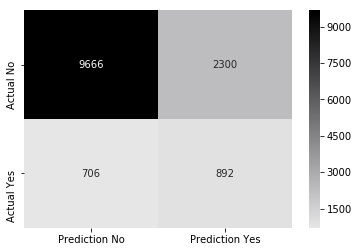

In [51]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

In [52]:
# Creating Classification Report

cr = metrics.classification_report(y_test, y_pred_test)
print(cr)

             precision    recall  f1-score   support

          0       0.93      0.81      0.87     11966
          1       0.28      0.56      0.37      1598

avg / total       0.86      0.78      0.81     13564



### 5 Decision Tree <a id='rf'>

In [53]:
# Importing the packages for Decision Tree Classifier

from sklearn import tree
my_tree_one = tree.DecisionTreeClassifier(class_weight="balanced",criterion="entropy", max_depth=3, random_state=42)
my_tree_one

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

This shows all the hyperparameters of Decision Tree model

### 5.1 Training Decision Tree Model  <a id='tdt'>

In [54]:
# splitting the data into train and test with 70:30 ratio

Xd = df.drop('output',axis = 1)
yd = df['output']

from sklearn.cross_validation import train_test_split
xd_train, xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size=0.30, random_state=42)

In [55]:
# Fit the decision tree model on your features and label

my_tree_one = my_tree_one.fit(xd_train, yd_train)

In [56]:
# The feature_importances_ attribute make it simple to interpret the significance of the predictors you include

list(zip(Xd.columns,my_tree_one.feature_importances_))

[('pdays_cat', 0.0),
 ('is_prev10', 0.0),
 ('is_camp25', 0.0),
 ('is_day10', 0.0),
 ('job_admin.', 0.0),
 ('job_blue-collar', 0.0),
 ('job_entrepreneur', 0.0019463878371225132),
 ('job_housemaid', 0.0),
 ('job_management', 0.0),
 ('job_retired', 0.0),
 ('job_self-employed', 0.0),
 ('job_services', 0.0),
 ('job_student', 0.0),
 ('job_technician', 0.0),
 ('job_unemployed', 0.0005922687600584745),
 ('marital_divorced', 0.0),
 ('marital_married', 0.0),
 ('marital_single', 0.0),
 ('crddefault_no', 0.0),
 ('crddefault_yes', 0.0),
 ('housloan_no', 0.003719785894236718),
 ('housloan_yes', 0.0),
 ('perloan_no', 0.0),
 ('perloan_yes', 0.0),
 ('month_apr', 0.0),
 ('month_aug', 0.0),
 ('month_dec', 0.0),
 ('month_jun', 0.0),
 ('month_mar', 0.0),
 ('month_oct', 0.0),
 ('month_sep', 0.0),
 ('education_primary', 0.0),
 ('education_secondary', 0.0),
 ('education_tertiary', 0.0),
 ('education_unknown', 0.0),
 ('contact_cellular', 0.2215318656754989),
 ('contact_telephone', 0.09438669039295491),
 ('pout

In [57]:
# The accuracy of the model

print(my_tree_one.score(xd_train, yd_train))

0.7744493948873511


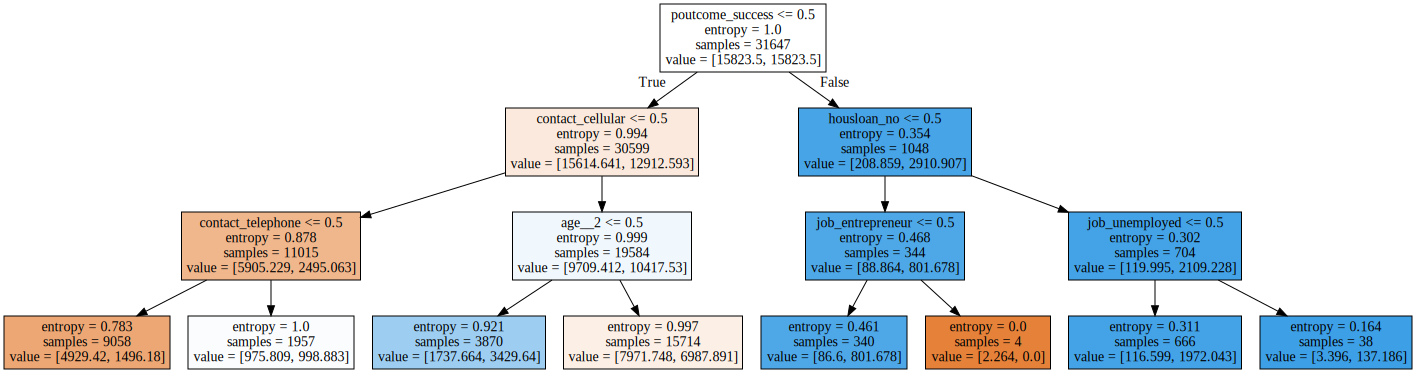

In [58]:
# Visualize the decision tree graph

with open('tree.dot','w') as dotfile:
    tree.export_graphviz(my_tree_one, out_file=dotfile, feature_names=Xd.columns, filled=True)
    dotfile.close()
    
# You may have to install graphviz package using 
# conda install graphviz
# conda install python-graphviz

from graphviz import Source

with open('tree.dot','r') as f:
    text=f.read()
    plot=Source(text)
plot   

### 5.2 Predictions from Decision Tree Model   <a id='pdt'>

In [59]:
#This is the test dataset where we are going to predict who will take term deposit.

xd_test.head()

,pdays_cat,is_prev10,is_camp25,is_day10,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,age__1,age__2,age__3,pdays__0,pdays__1
3776,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
9928,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
33409,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
31885,0,1,1,1,0,0,0,0,1,0,...,1,0,1,0,0,0,1,0,1,0
15738,0,1,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0


In [60]:
# Predictions from Decision Tree Model

yd_pred = my_tree_one.predict(xd_test)

### 5.3 Evaluating the Decision Tree Model  <a id='edt'>

In [61]:
#Print Confusion matrix on test Data
from sklearn import metrics

df_confusion = metrics.confusion_matrix(yd_test, yd_pred)
df_confusion

array([[9748, 2218],
       [ 901,  697]], dtype=int64)

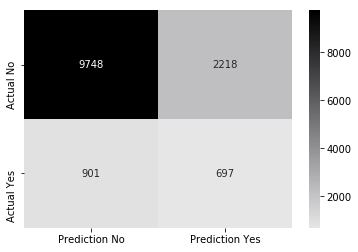

In [62]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(df_confusion,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

In [63]:
# Creating Classification Report for DT

cr = metrics.classification_report(yd_test, yd_pred)
print(cr)

             precision    recall  f1-score   support

          0       0.92      0.81      0.86     11966
          1       0.24      0.44      0.31      1598

avg / total       0.84      0.77      0.80     13564



### 5.4. Fine tuning Hyper parameters  <a id = 'appendix'>

** Grid Search **

Grid-searching is the process of scanning the data to configure optimal parameters for a given model.  <br>
Let's apply Grid Search on a Decision Tree Model. It has many parameters like tree depth, criterion... etc. We will build different models with different combinations of these parameters and come up with the best model. 


In [64]:
# Different parameters we want to test

max_depth = [5,10,15] 
criterion = ['gini', 'entropy']

In [65]:
# Importing GridSearch

from sklearn.grid_search import GridSearchCV

C:\Users\sandeep.rathod\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [66]:
# Building the model

my_tree_three = tree.DecisionTreeClassifier()

# Cross-validation tells how well a model performs on a dataset using multiple samples of train data
grid = GridSearchCV(estimator = my_tree_three, cv=3, 
                    param_grid = dict(max_depth = max_depth, criterion = criterion))

In [67]:
grid.fit(xd_train,yd_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 10, 15], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [68]:
# Best accuracy score

grid.best_score_

0.8907953360508105

In [69]:
# Best parameters for the model

grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [71]:
# Building the model based on new parameters

my_tree_three = tree.DecisionTreeClassifier(class_weight="balanced",criterion= 'entropy', max_depth= 10, random_state=42)

In [72]:
my_tree_three.fit(xd_train,yd_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [73]:
# Accuracy Score for new model

my_tree_three.score(xd_train,yd_train)

0.8349922583499226

**Observation: **Our accuracy score improve from 0.89 to 0.89.47 

In [74]:
# Predictions from Decision Tree Model

yd_pred = my_tree_three.predict(xd_test)

### 5.3 Evaluating the Decision Tree Model after fine tuning <a id='edt'>

In [75]:
#Print Confusion matrix on test Data
from sklearn import metrics

df_confusion = metrics.confusion_matrix(yd_test, yd_pred)
df_confusion

array([[10343,  1623],
       [  806,   792]], dtype=int64)

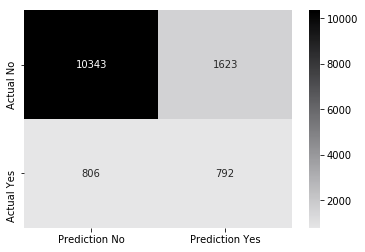

In [76]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(df_confusion,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

In [77]:
# Creating Classification Report for DT after fine tuning hyper parameters

cr = metrics.classification_report(yd_test, yd_pred)
print(cr)

             precision    recall  f1-score   support

          0       0.93      0.86      0.89     11966
          1       0.33      0.50      0.39      1598

avg / total       0.86      0.82      0.84     13564



### 6. Random Forest  <a id='rf'>

In [78]:
# Building and fitting Random Forest

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(class_weight="balanced",max_depth = 10, n_estimators = 100, random_state = 1)
forest

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

### 6.1 Training Random Forest Model  <a id='trf'>

In [79]:
# Fitting the model on Train Data

my_forest = forest.fit(xd_train, yd_train)

In [80]:
# Print the accuracy score of the fitted random forest

print(my_forest.score(xd_train, yd_train))

0.8075962966473915


 ### 6.2 Predictions from Random Forest Model   <a id='prf'>

In [81]:
# Making predictions

yr_pred = my_forest.predict(xd_test)

### 6.3 Evaluating the Random Forest Model   <a id='erf'>

In [82]:
df_confusion_rf = metrics.confusion_matrix(yd_test,yr_pred)
df_confusion_rf

array([[9883, 2083],
       [ 678,  920]], dtype=int64)

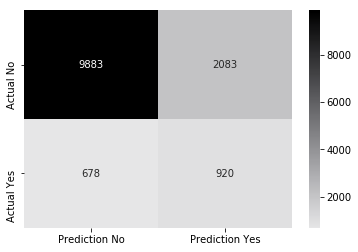

In [83]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(df_confusion_rf, cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

In [84]:
# Creating Classification Report

cr = metrics.classification_report(yd_test, yr_pred)
print(cr)

             precision    recall  f1-score   support

          0       0.94      0.83      0.88     11966
          1       0.31      0.58      0.40      1598

avg / total       0.86      0.80      0.82     13564



**Randomized Search**

Using Randomized Search, we can define a grid of hyperparameters and randomly sample from the grid to get the best combination of values. <br>
Lets apply Randomized search on Random Forest model. This model has plenty of parameters like number of trees, depth of trees...etc. We will evaluate models with different parameters and come up with the best model.

In [85]:
# Different parameters we want to test

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [86]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [87]:
# Importing RandomizedSearchCV

from sklearn.grid_search import RandomizedSearchCV

In [88]:
forest_two = RandomForestClassifier()

# Fitting 3 folds for each of 100 candidates, totalling 300 fits
rf_random = RandomizedSearchCV(estimator = forest_two, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42)

In [193]:
rf_random.fit(xd_train,yd_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=233, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=233, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True -  10.1s
[CV] n_estimators=233, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.1s remaining:    0.0s


[CV]  n_estimators=233, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True -  10.4s
[CV] n_estimators=233, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=233, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True -  11.2s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True -  12.0s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True -  11.3s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=5, min_samples_lea

[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False -  12.6s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False -  15.3s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False -  12.9s
[CV] n_estimators=433, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=433, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False -  11.2s
[CV] n_estimators=433, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=433, min_samples_split=5, mi

[CV]  n_estimators=466, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True -  17.5s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False -  23.2s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False -  22.6s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False -  22.4s
[CV] n_estimators=233, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=233, min_samples_split=2, min_

[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False -  12.1s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False -  12.2s
[CV] n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True -  11.9s
[CV] n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True -  11.9s
[CV] n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=366, min_samples_split=5, min_sampl

[CV]  n_estimators=233, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False -   9.9s
[CV] n_estimators=233, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=233, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False -  10.5s
[CV] n_estimators=233, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=233, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False -   9.9s
[CV] n_estimators=366, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=366, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False -  15.8s
[CV] n_estimators=366, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=366, min_samples_split=2, mi

[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True -  16.7s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True -  16.8s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True -  14.4s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True -  14.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=2, min_samp

[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False -  17.2s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False -  17.2s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False -  12.1s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False -  12.0s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=2, min_sam

[CV]  n_estimators=333, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True -  11.0s
[CV] n_estimators=333, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=333, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True -  11.3s
[CV] n_estimators=333, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=333, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True -  10.9s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False -  14.0s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=1

[CV]  n_estimators=266, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=True -   8.5s
[CV] n_estimators=266, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=266, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False -  11.5s
[CV] n_estimators=266, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=266, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False -  13.4s
[CV] n_estimators=266, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=266, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False -  11.3s
[CV] n_estimators=233, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=233, min_samples_split=10, min_sa

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 72.1min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'n_estimators': [200, 233, 266, 300, 333, 366, 400, 433, 466, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          scoring=None, verbose=2)

In [194]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': True}

A Random Forest model built with this hyperparameters will provide best accuracy

In [89]:
# Building and fitting Random Forest after tuning 

from sklearn.ensemble import RandomForestClassifier

forest_two = RandomForestClassifier(min_samples_split=10,min_samples_leaf=4,max_features='sqrt',class_weight="balanced",max_depth = 100, n_estimators = 300, random_state = 1,bootstrap= True)
forest_two

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=100, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=4,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

### 6.1 Training Random Forest Model after tuning <a id='trf'>

In [90]:
# Fitting the model on Train Data

my_forest_two = forest_two.fit(xd_train, yd_train)

In [91]:
# Print the accuracy score of the fitted random forest

print(my_forest_two.score(xd_train, yd_train))

0.8239643568110722


 ### 6.2 Predictions from Random Forest Model   <a id='prf'>

**Observation: ** The original Random forest algorithm gave 0.90 accuracy whereas after Randomized Grid Search we have only got 0.82. This is the best random combination of parameters the algorithm has choosen which produced the highest accuracy.

 ### 6.2 Predictions from Random Forest Model after fine tuning of Hyperparameters  <a id='prf'>

In [92]:
# Making predictions

yrf_pred = my_forest_two.predict(xd_test)

### 6.3 Evaluating the Random Forest Model after fine tuning of Hyperparameters   <a id='erf'>

In [93]:
df_confusion_rf = metrics.confusion_matrix(yd_test,yrf_pred)
df_confusion_rf

array([[10010,  1956],
       [  665,   933]], dtype=int64)

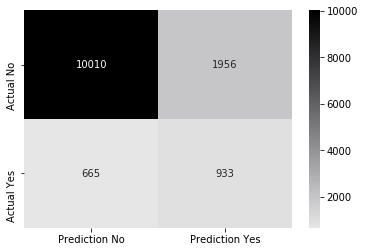

In [94]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(df_confusion_rf, cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

In [95]:
# Creating Classification Report

cr = metrics.classification_report(yd_test, yrf_pred)
print(cr)

             precision    recall  f1-score   support

          0       0.94      0.84      0.88     11966
          1       0.32      0.58      0.42      1598

avg / total       0.87      0.81      0.83     13564



### 5. ROC curve  <a id='roc'>

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.It tells how good a model can distinguish between two classes.

The curve is created by plotting the **true positive rate** against **false positive rate**.<br>
**True Positive Rate(TPR) ** is same as **recall or sensitivity**.  <br>
**False Positive Rate** is known as probability of false alarm. This is calculated as (1 - Specificity) <br>


** ROC Curve of balanced Logistic Regression Model **

In [97]:
predict_probabilities_LR = logreg.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities_LR[:,1])

# Lets look at all the thresholds
print(thresholds)

[0.9940358  0.99372435 0.99340706 ... 0.16316089 0.16026544 0.15568484]


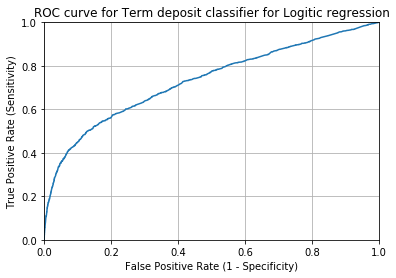

In [101]:
# Plotting the ROC Curve

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Term deposit classifier for Logitic regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

** AUC of balanced Logistic Regression Model **

In [107]:
optimal_idx = np.argmax(np.abs(tpr - fpr))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold 

0.6637193485194373

In [99]:
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve for balanced logistic regression : %f" % roc_auc)

Area under the ROC curve for balanced logistic regression : 0.731715


In [109]:
predict_probabilities_DT = my_tree_three.predict_proba(xd_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities_DT[:,1])

# Lets look at all the thresholds
print(thresholds)

[2.         1.         0.97427355 0.9724865  0.97149653 0.96804744
 0.96364872 0.96168035 0.95784557 0.95784557 0.95242006 0.94785648
 0.94644645 0.94293966 0.93807359 0.92950072 0.92303147 0.91910137
 0.91030821 0.90990016 0.90201308 0.89496749 0.89379402 0.88336967
 0.8788476  0.87509433 0.86585194 0.86502634 0.86323382 0.85834248
 0.84544486 0.83889659 0.83829795 0.83469433 0.83053397 0.82793569
 0.82559596 0.81963977 0.8154377  0.81231431 0.80798155 0.8071615
 0.79110306 0.79110306 0.77097137 0.75937677 0.74567064 0.73363293
 0.73132305 0.71628789 0.67910585 0.66884783 0.66235957 0.65440075
 0.64328481 0.63933571 0.63608164 0.6023572  0.6023572  0.57932092
 0.53788178 0.52307018 0.51969587 0.47613587 0.47550523 0.47119898
 0.45530529 0.43965614 0.40625152 0.37574722 0.35940322 0.35107372
 0.32612671 0.31698618 0.299171   0.25784958 0.24367888 0.24202963
 0.22429727 0.20708915 0.19018884 0.12830403 0.12104208 0.05275394
 0.        ]


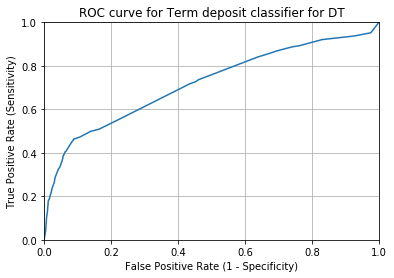

In [110]:
# Plotting the ROC Curve

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Term deposit classifier for DT')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

** AUC of balanced Decesion TRee Model **

In [111]:
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve for balanced logistic regression : %f" % roc_auc)

Area under the ROC curve for balanced logistic regression : 0.717422


In [112]:
optimal_idx = np.argmax(np.abs(tpr - fpr))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold 

0.5793209204977567

In [114]:
predict_probabilities_RF = my_forest_two.predict_proba(xd_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities_RF[:,1])

# Lets look at all the thresholds
print(thresholds)

[0.95535487 0.95494903 0.95458796 ... 0.05785093 0.05741335 0.0469608 ]


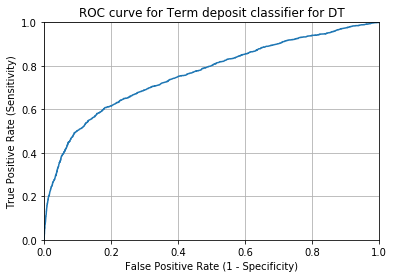

In [115]:
# Plotting the ROC Curve

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Term deposit classifier for DT')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

** AUC of balanced Random forest Model **

In [116]:
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve for balanced logistic regression : %f" % roc_auc)

Area under the ROC curve for balanced logistic regression : 0.763229


In [117]:
optimal_idx = np.argmax(np.abs(tpr - fpr))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold 

0.47503820143837033

 ### 6.2 Predictions from Random Forest Model after changing the threshold to 0.47 instead of default to 0.5  <a id='prf'>

In [122]:
# Making predictions

yrf_pred = np.where(my_forest_two.predict_proba(xd_test)[:,1]>0.47,1,0)

### 6.3 Evaluating the Random Forest Model afterafter changing the threshold to 0.47 instead of default to 0.5     <a id='erf'>

In [123]:
df_confusion_rf = metrics.confusion_matrix(yd_test,yrf_pred)
df_confusion_rf

array([[9680, 2286],
       [ 621,  977]], dtype=int64)

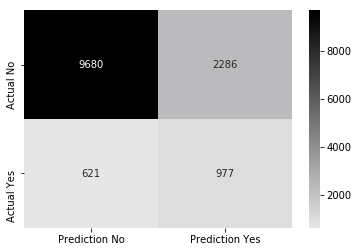

In [124]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(df_confusion_rf, cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

In [125]:
# Creating Classification Report

cr = metrics.classification_report(yd_test, yrf_pred)
print(cr)

             precision    recall  f1-score   support

          0       0.94      0.81      0.87     11966
          1       0.30      0.61      0.40      1598

avg / total       0.86      0.79      0.81     13564



### The End